In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle as pkl 
sns.set_theme(context = 'notebook', style='whitegrid')
from statsmodels.graphics.gofplots import qqplot
import statsmodels.tsa as tsa
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast
import statsmodels.tsa.seasonal as seasonal
import scipy.stats
import statsmodels.stats.diagnostic as diag

/home/jovyan/.conda/envs/GPU/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Check Log-returns distribution

## Sector hierarchy

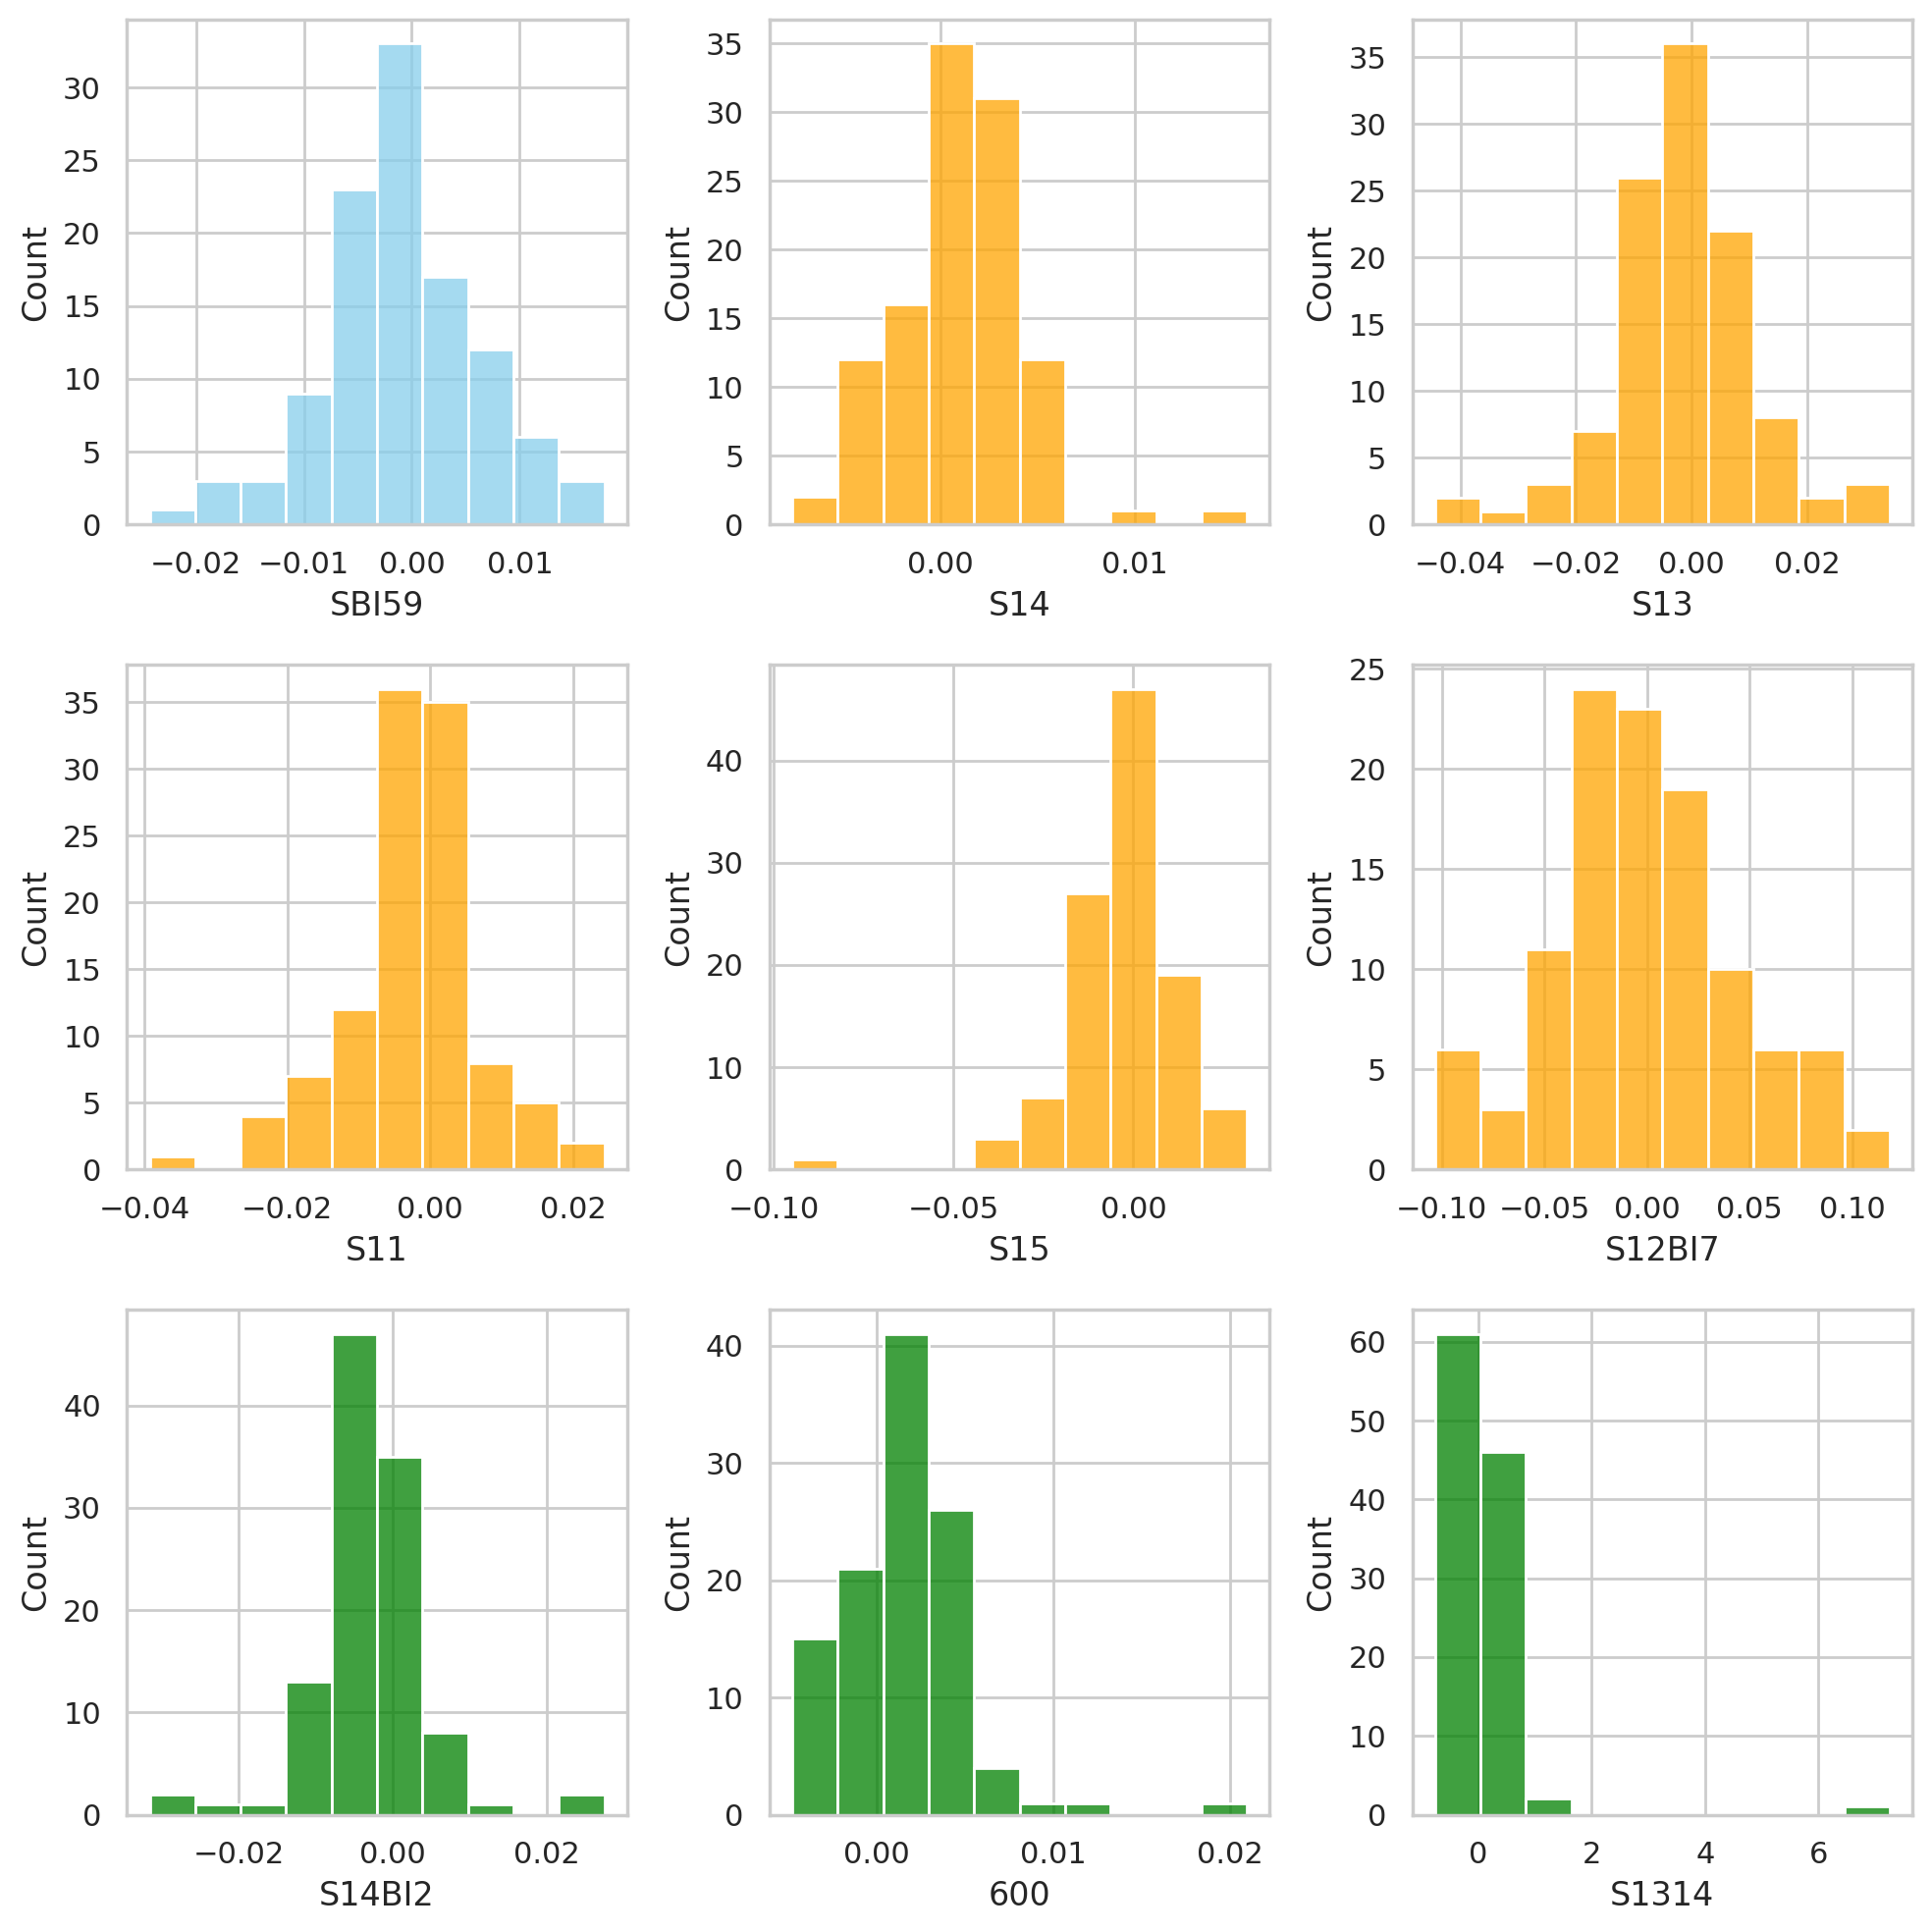

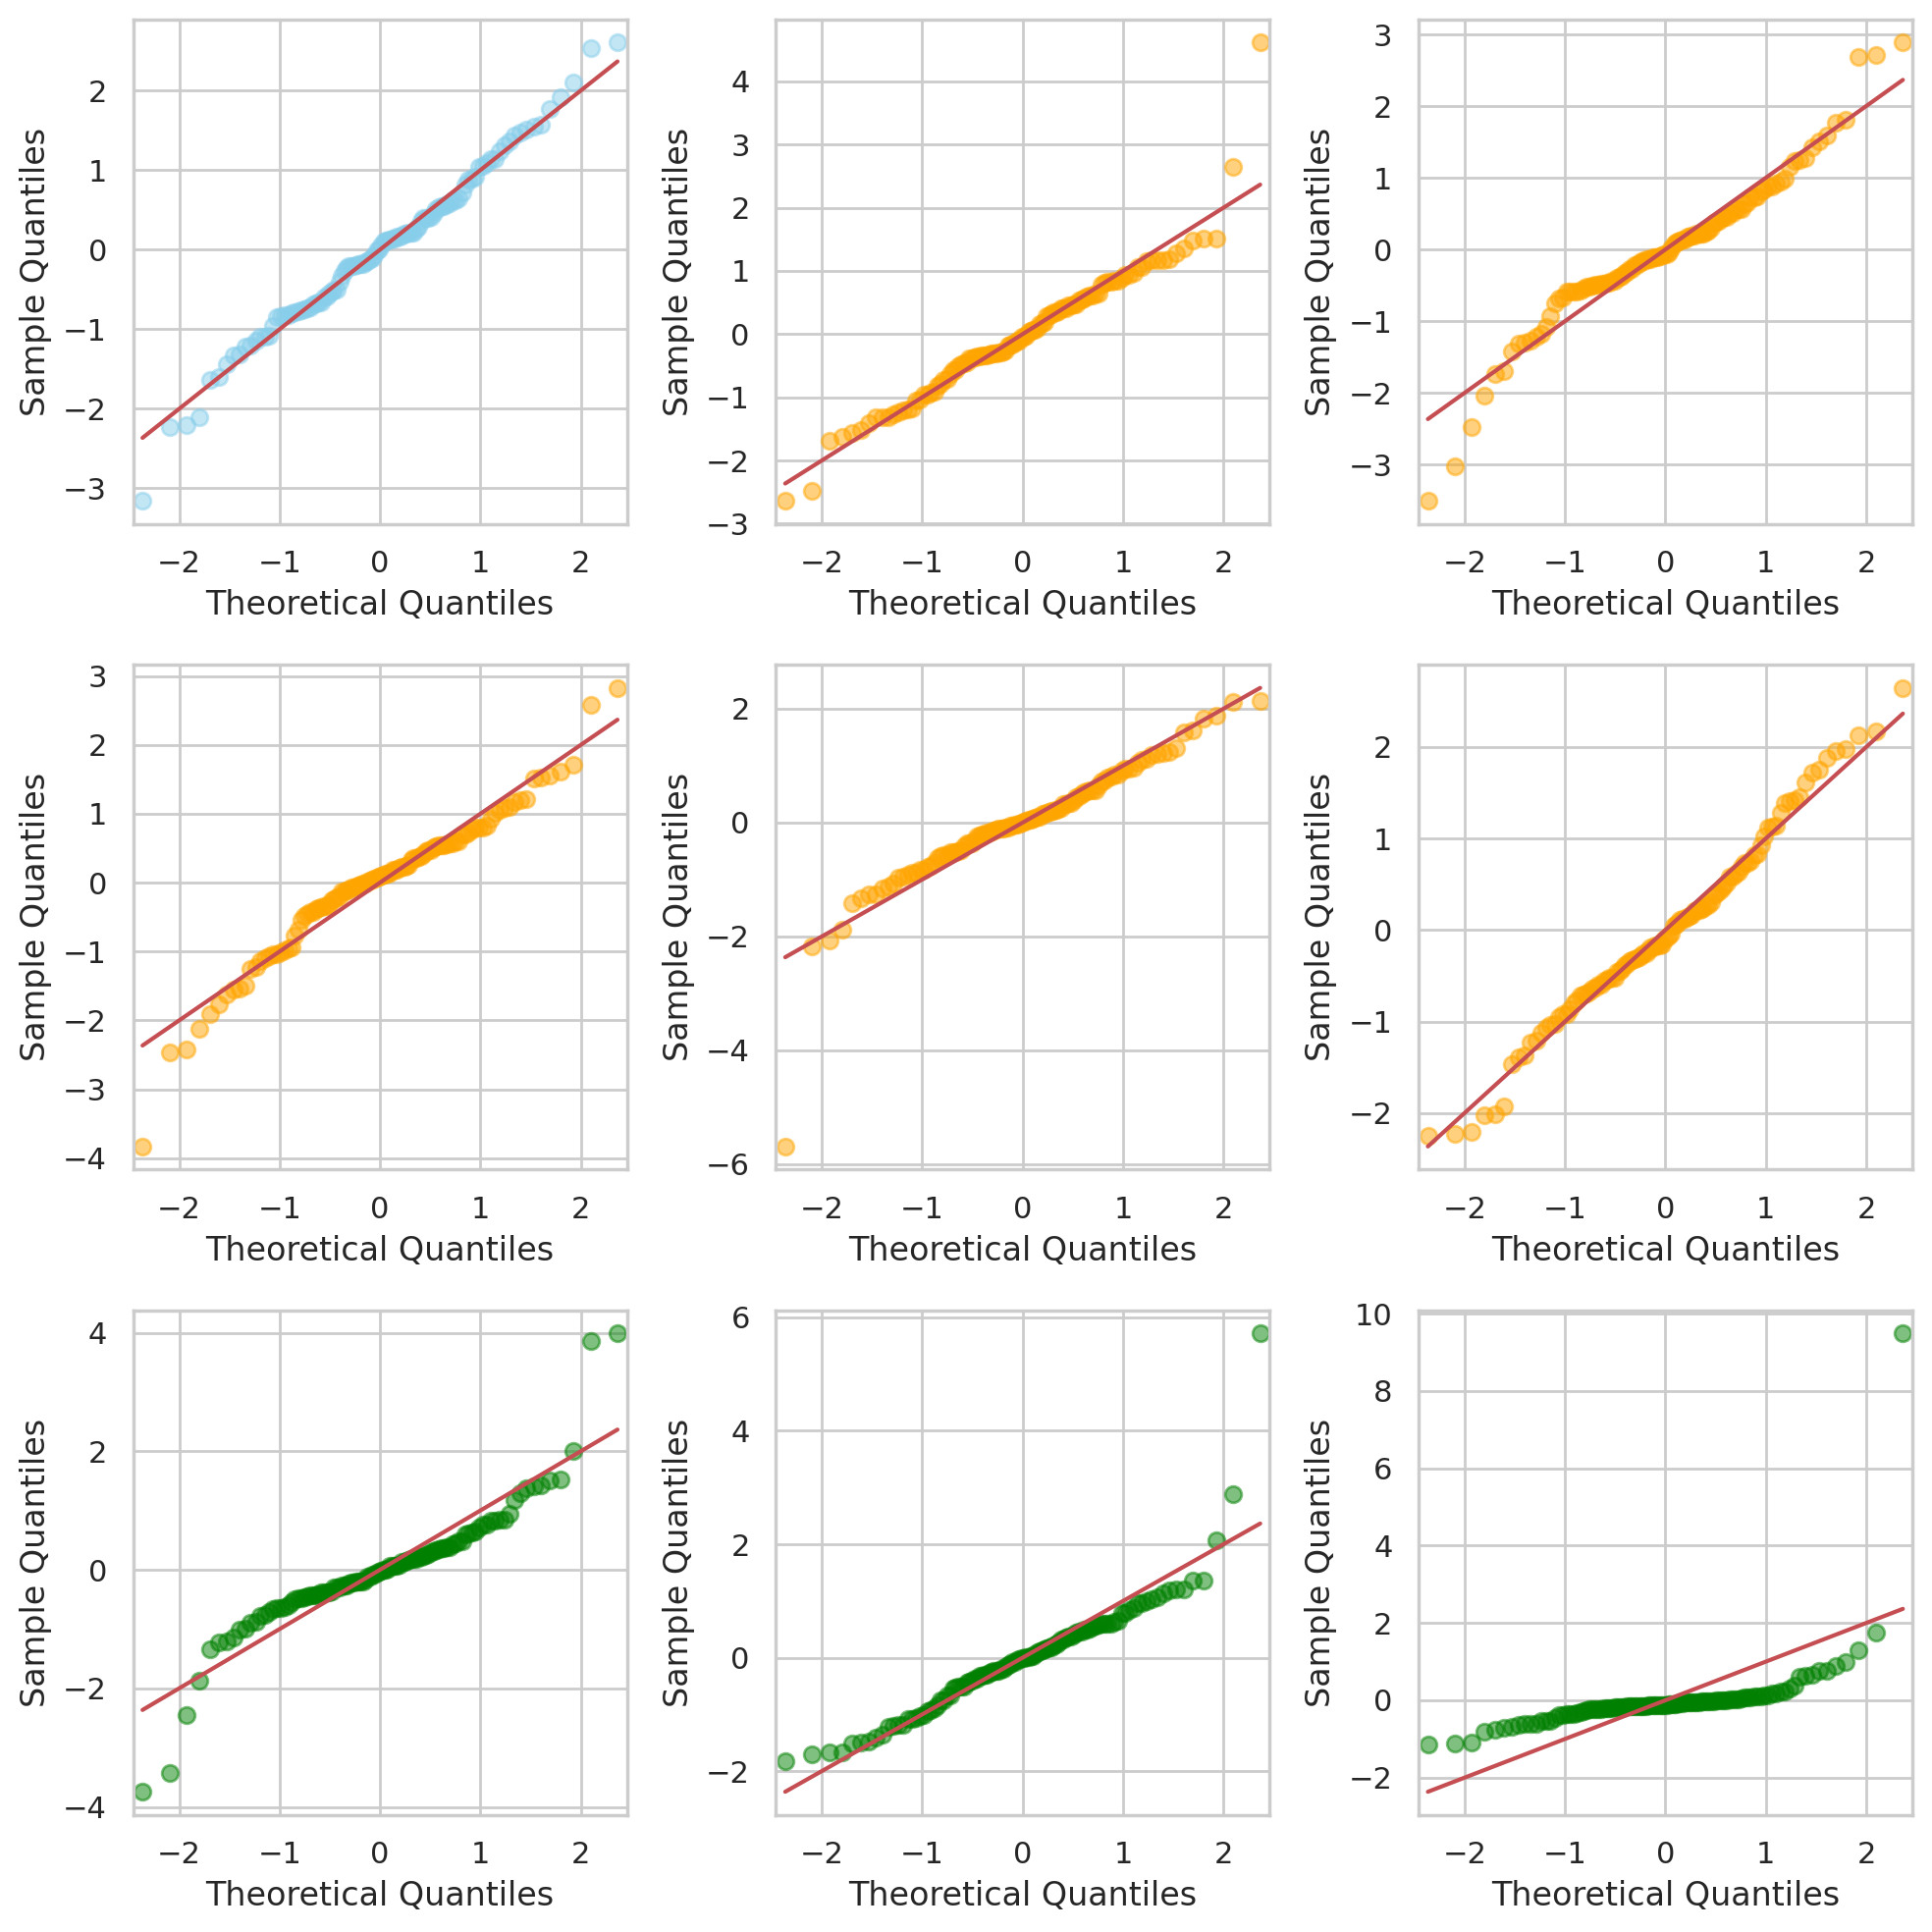

In [6]:
df = pd.read_parquet('./loans_sector.parquet')
mapping = pkl.load(open('./sector_mapping.pkl','rb'))
dict = pd.read_pickle('./sector_dict.pkl')
mapping = {v: k for k, v in mapping.items()}
map = [mapping[i] for i in range(21)]
df = df[map]
l = dict['levels_list']
colors = ['skyblue', 'orange', 'green']
log_returns = df.pct_change(1).dropna()
fig, axs = plt.subplots(3,3, figsize =(10,10), dpi = 200)
fig2, axs2 = plt.subplots(3,3, figsize =(10,10), dpi = 200)
fig.set_tight_layout(True)
fig2.set_tight_layout(True)
index = 0
for i in range(9):
    data = log_returns.iloc[10:,i]
    for k,a in enumerate(l):
        if data.name in a :
            index = k
        else:
            for b in a:
                if data.name in b :
                    index = k
    sns.histplot(data, ax=axs[i//3, i%3], bins = 10, color = colors[index])
    qqplot(data, fit = True, line = 's', ax=axs2[i//3, i%3], markerfacecolor = colors[index], markeredgecolor = colors[index], alpha = .5)

fig.savefig('sector_log_distribution.png', transparent = True)
fig2.savefig('sector_log_qqplot.png', transparent = True)


## Geographical hierarchy

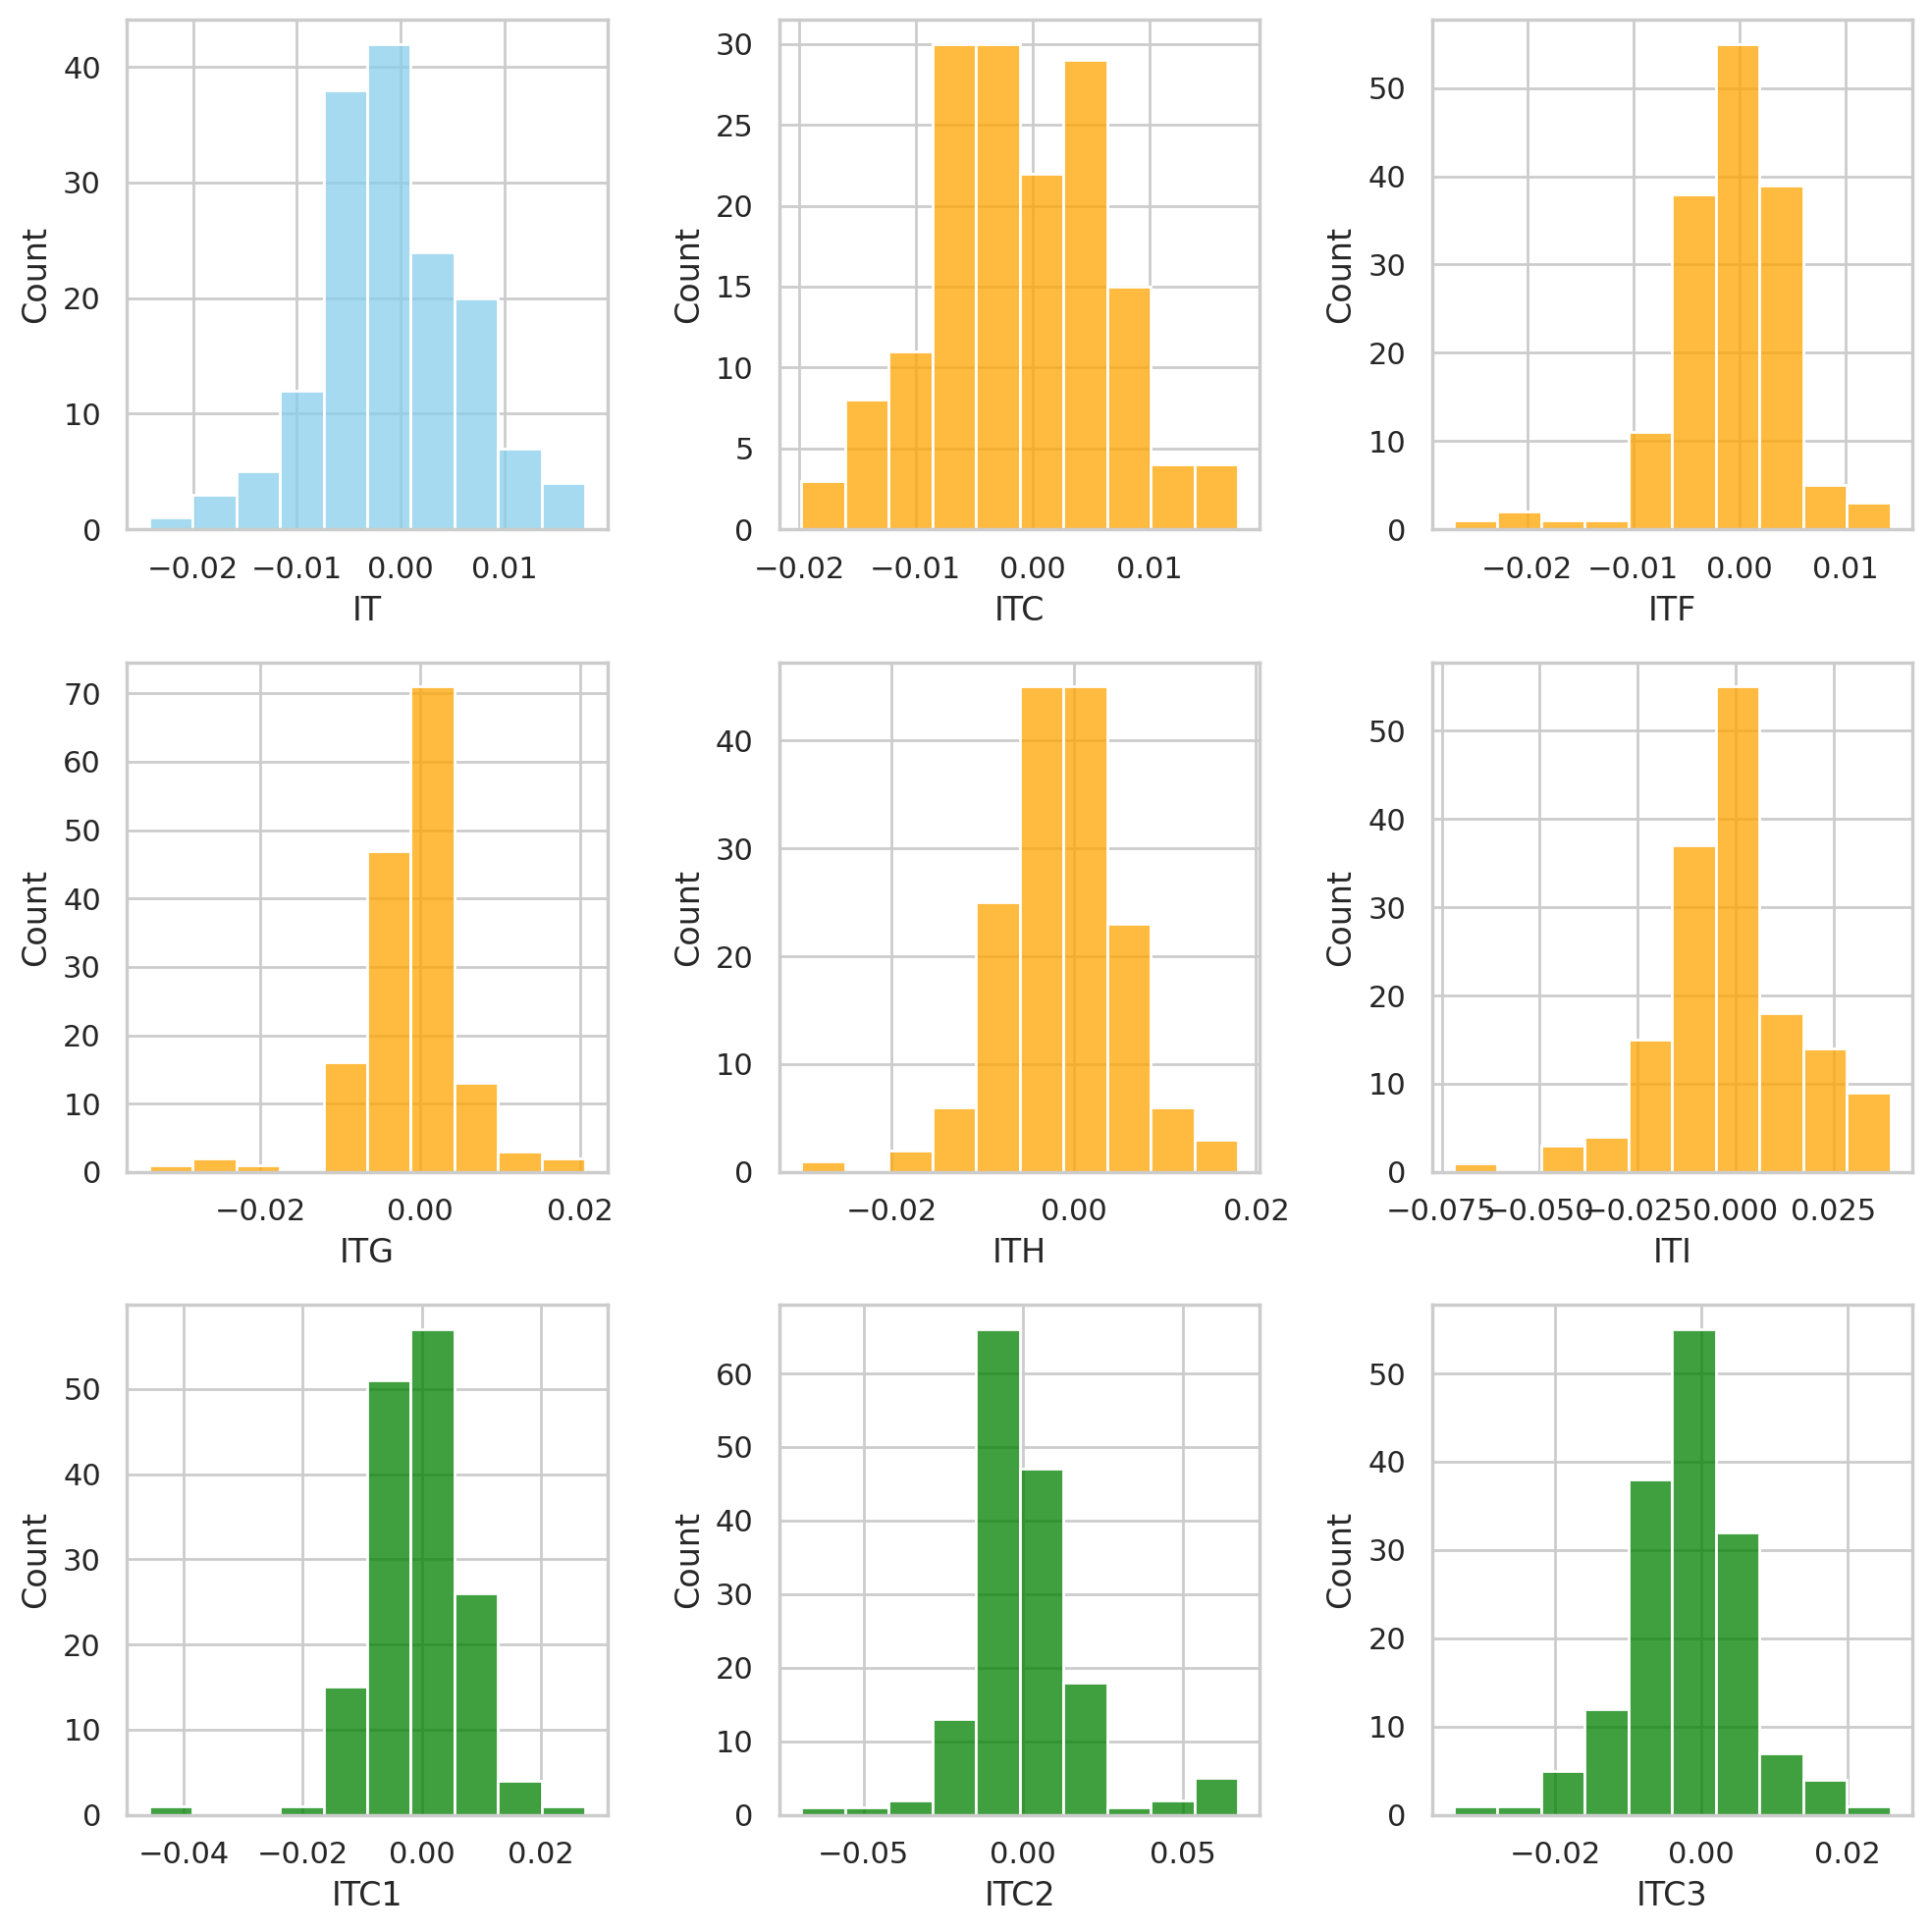

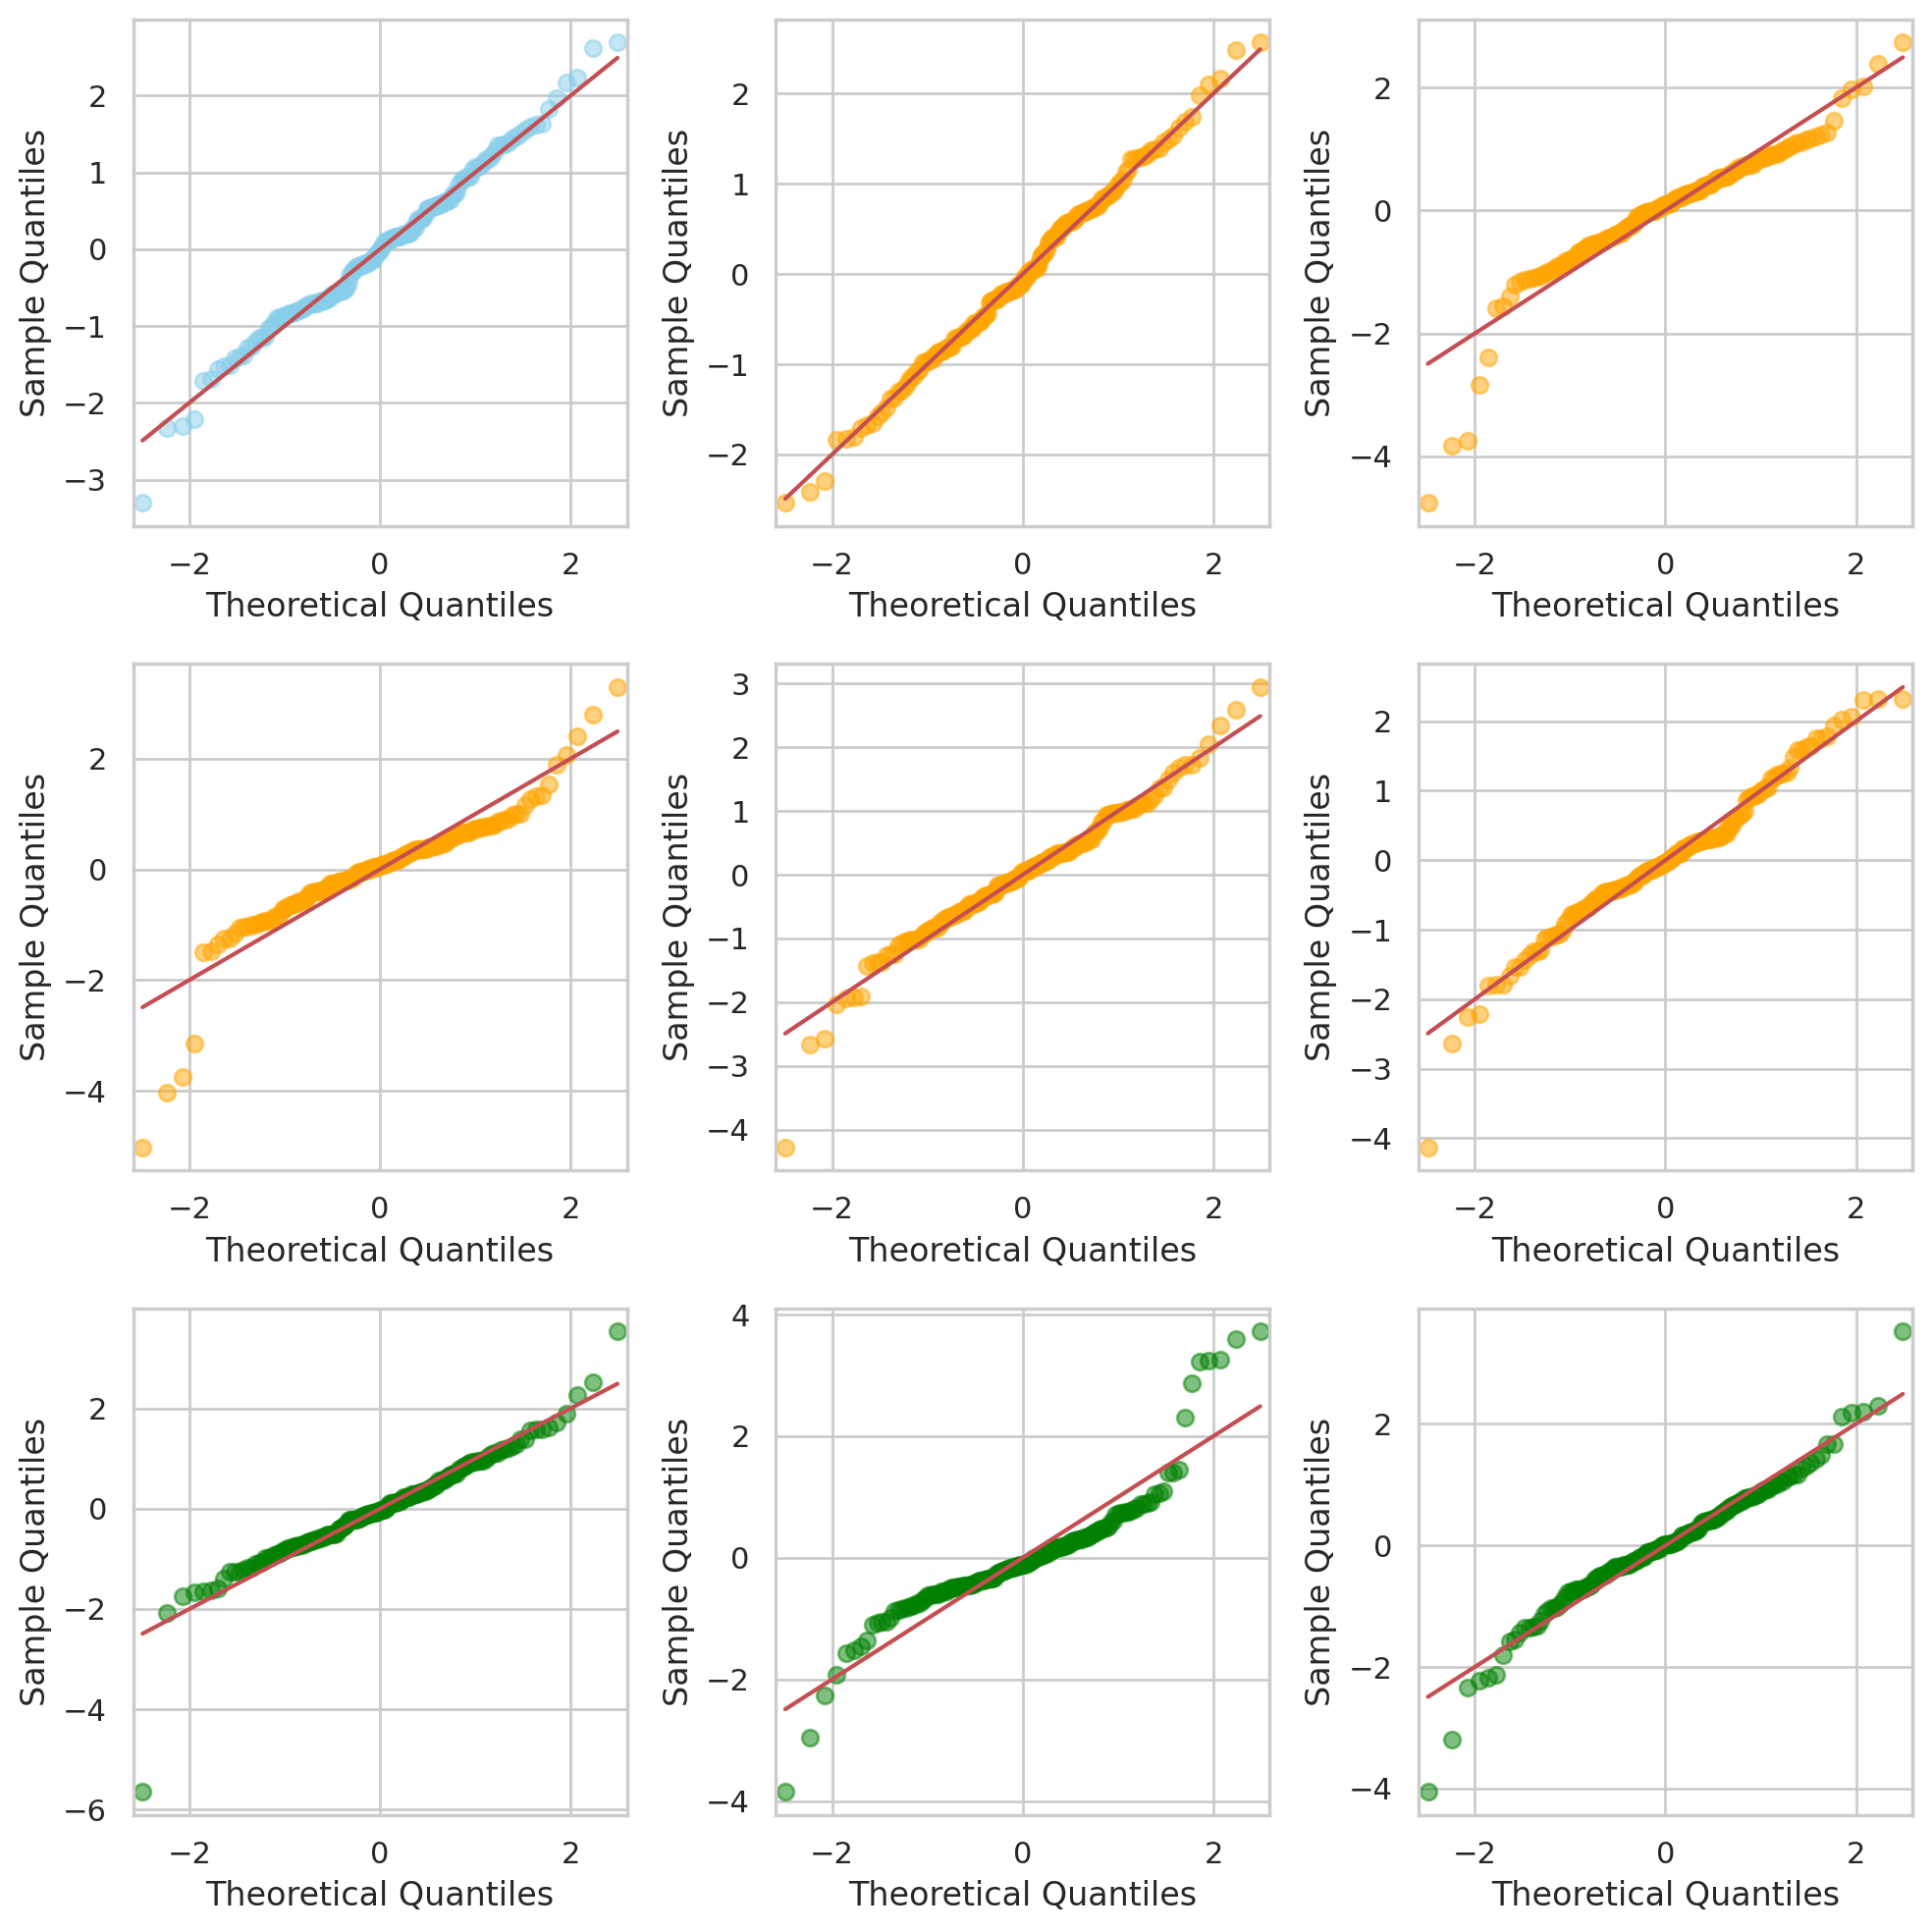

In [8]:
df = pd.read_parquet('./loans_geography.parquet')
mapping = pkl.load(open('./geo_mapping.pkl','rb'))
dict = pd.read_pickle('./geo_dict.pkl')
mapping = {v: k for k, v in mapping.items()}
map = [mapping[i] for i in range(21)]
df = df[map]
l = dict['levels_list']
colors = ['skyblue', 'orange', 'green']
log_returns = df.pct_change(1).dropna()
fig, axs = plt.subplots(3,3, figsize =(10,10), dpi = 200)
fig2, axs2 = plt.subplots(3,3, figsize =(10,10), dpi = 200)
fig.set_tight_layout(True)
fig2.set_tight_layout(True)
index = 0
for i in range(9):
    data = log_returns.iloc[10:,i]
    for k,a in enumerate(l):
        if data.name in a :
            index = k
            break
        else:
            for b in a:
                if data.name in b :
                    index = k

    sns.histplot(data, ax=axs[i//3, i%3], bins = 10, color = colors[index])
    qqplot(data, fit = True, line = 's', ax=axs2[i//3, i%3], markerfacecolor = colors[index], markeredgecolor = colors[index], alpha = .5)

fig.savefig('./geo_log_distribution.png', transparent = True)
fig2.savefig('./geo_log_qqplot.png', transparent = True)
